## Välkommen till L16!

Vi ska idag lära oss om både notebooks, men huvudsakligen numpy och Vectorization!

Numpy är ett bibliotek ämnat för att optimera numeriska operationer och är använt i mer eller mindre alla former av Pythonutveckling för ML/AI/Data projekt. Många bibliotek bygger på det och är nästintill ett krav för att modeller ska prestera väl

## Användbara kommandon i google colab

- Shift + Enter = Kör en kodcell och sätt nästa i fokus
- Ctrl + Enter = Kör nuvarande cell
- Ctrl + Z = backar på din kod i cell
- Ctrl + F8  = kör alla celler
- Ctrl + M + B = Skapa ny cell under
- Ctrl + M + A = Skapa ny cell över
- Ctrl + M + D = Ta bort vald cell
- Ctrl + M + M = Gör cell till en textcell
- Ctrl + M + Y = Gör cell till en kodcell

Vi Skriver en hello world!




In [1]:
print("hello")

hello


Låt oss nu börja kika lite mer på numpy, vi importerar modulen


In [2]:
# Vi börjar med lite packet vi behöver

!pip install memory-profiler
!pip install numpy matplotlib

import matplotlib
import numpy as np
import sys
import time

import requests
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.zeros((3, 4), dtype="int64")
arr3 = np.ones((2, 2))
arr4 = np.arange(0, 10, 2)
arr5 = np.zeros(10000)
list2 = [0] * 10000

list1 = [1,2,3,4,5]

print(arr1)
print(arr2)
print(arr3)
print(sys.getsizeof(arr1))
print(sys.getsizeof(list1))




[1 2 3 4 5]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1. 1.]
 [1. 1.]]
152
104


Låt oss nu kika lite på hur man kan undersöka dessa, de ser ju egentligen bara ut som vanliga listor i Python?



In [ ]:
print(arr2.dtype)
print(arr2.size)
print(arr2.shape)
print(np.square(arr1))

## Vad gör dessa speciella utöver datatyper och optimering?
Vektorisering och broadcasting! Två superviktiga koncept

Vektorisering innebär att när man utför numeriska operationer på en array kan man göra och se detta som en matrismultiplikation snarare än att man behöver forloopa igeno varje element. Denna typ av operation är löjligt mycket snabbare än att forloopa

Broadcasting är ett koncept för hur man kan multiplicera exempelvis en array med ett vanligt tal, under huven "förlängs" talet till att bli en matris av samma storlek som matrisen den multipliceras med, och därefter blir det egentligen matrismultiplikation

Låt oss kika hur dessa koncept ser ut i kod! Vi börjar med broadcasting

In [21]:
arr1 = np.arange(1, 10).reshape((3, 3))
print("This is the array: \n", arr1)
print("This is the array multiplied by 2: \n", arr1 * 2)

arr2 = arr1 * 2
arr3 = np.full((3, 3), 2)

print("And with arr3: \n", arr1 * arr3)


This is the array: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
This is the array multiplied by 2: 
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
And with arr3: 
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [24]:
# Och nu till vektorisering! Vi börjar med en dålig gammal lösning:

def double_elements_non_vectorized(arr):
    result = np.zeros_like(arr)
    for i in range(len(arr)):
        result[i] = arr[i] * 2
    return result

arr = np.array([1, 2, 3, 4, 5])
result_non_vectorized = double_elements_non_vectorized(arr)
print(result_non_vectorized)

# Med vektorisering:

def double_elements_vectorized(arr):
    # Notera här att broadcasting sker först, och "vektoriseringen" är egentligen matrismultiplikationen
    return arr * 2

result_vectorized = double_elements_vectorized(arr)
print(result_vectorized)


[ 2  4  6  8 10]
[ 2  4  6  8 10]


## Vi kikar på två andra viktiga koncept: reshape och view!

In [34]:
# Vi skapar en endimensionell array vi sedan reshapar
arr = np.arange(12)

reshaped_arr = arr.reshape((3, 4))

print("Original array:")
print(arr)
print("\nReshaped array:")
print(reshaped_arr)

# Use view to create a 3x4 matrix
view_arr = arr.view()

view_arr[0] = 99

print("Original array:")
print(arr)
print("\nView array:")
print(view_arr)

Original array:
[ 0  1  2  3  4  5  6  7  8  9 10 11]

Reshaped array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Original array:
[99  1  2  3  4  5  6  7  8  9 10 11]

View array:
[99  1  2  3  4  5  6  7  8  9 10 11]


# Övningar, Del 1: Basic Numpy:

1. Skapa en 3x3 matris med randomiserade heltalsvärden mellan 1 till 10, sätt dtype till int32
2. Printa Shape, datatype och storlek på matrisen
3. Utför elementvis multiplikation med 2 på ursprungsmatrisen
4. Beräkna medelvärdet på hela matrisen
5. Addera matrisen du multiplicera med två med en annan matris som också randomiserats med heltalsvärden mellan 1 till 10

In [39]:
np.random.seed(1337)

# Skriv din kod här nedan och kör blocket!!


'\nFörväntat resultat i steg 5: \n\n[[26 25 23]\n [28 25  8]\n [13 17 21]]\n'

### Förväntat resultat i steg 5:




```
[[26 25 23]
 [28 25  8]
 [13 17 21]]
```




# Övningar, Del 2:

I denna övning ska vi kika lite på bilder i Numpy tillsammans med det populära visualiseringsbiblioteket MatPlotlib! Du får lite färdig kod för att hämta en bild nedan, innan du börjar med uppgifterna se till att du är bekväm med den existerande koden! Prova byta till en bild du själv gillar. Alternativt så gillar du min bild kör på för all del! Utför sedan följande övningar:

1. Printa shape och dtype på din bild
2. Ta en funderar på vad shapen egentligen innebär, varför varför är det en array med tre dimensioner?
3. Hur plockar man ut en specifik pixel och får dess färg?
4. Sätt alla pixlar på högra sidan av bilden till grön (Skriv en forloop som går igenom var rad för sig, sedan var kolumn, och ändrar sedan dess pixelbärde)

### Vektorisering
5. Hur kan jag med en vektoriserad operation välja hälften av alla pixlar? (tips: när man väljer ut en pixel är det enkelt att växla upp och välja alla pixlar på samma rad exempelvis, man kan då säga något i stil med :height/2 exempelvis. Tänk här att du vill skapa en ny array som egentligen innehåller bara hälften av de värden som finns i originalet, och där skriver du över det gamla!)
6. Sätt den vänstra hälften av din bilds pixlar till röd
7. Plotta om den och se att det funkar



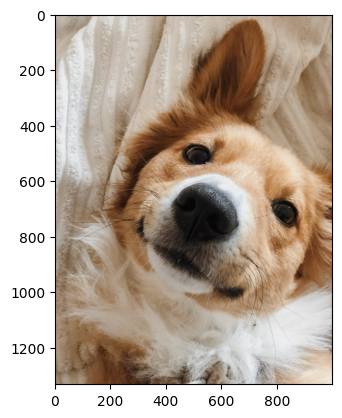

In [25]:

# Länk till bilden
image_url = 'https://images.unsplash.com/photo-1615751072497-5f5169febe17?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8Y3V0ZSUyMGRvZ3xlbnwwfHwwfHx8MA%3D%3D'

# Hämta bilden
response = requests.get(image_url)
image_content = response.content

# Gör bilden läsbar med bytesio och Image.open
image = Image.open(BytesIO(image_content))
image_array = np.array(image)

# Visa bilden:
plt.imshow(image_array)
plt.show()

# Skriv din kod härefter!

# Frågor att googla eller tänka på:

- Vad är egentligen vektorisering?
- Hur fungerar broadcasting? Varför tillåter det oss att multiplicera en array så lätt som array * 2
- Varför är detta så effektivt i jämförelse med en lista och traditionell forloop?

### Det var allt på ämnet om numpy för nu! Det kommer säkerligen lyftas lite igen och jag uppmuntrar er starkt till att göra er lite mer bekväma med både notebooks och numpy då det är otroligt bra verktyg att ha tillhands. Hoppas det känts lärorikt!

